# Getting Financial Data - Google Finance

### Introduction:

This time you will get data from a website.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2. Create your time range (start and end variables). The start date should be 01/01/2015 and the end should today (whatever your today is)

In [18]:
from datetime import datetime
start_date = datetime(2015,1,1)
end_date = datetime(2020,9,9)

In [34]:
end_date

datetime.datetime(2020, 9, 9, 0, 0)

### Step 3. Select the Apple, Tesla, Twitter, IBM, LinkedIn stocks symbols and assign them to a variable called stocks

In [26]:
stocks = ['AAPL','TSLA','TWTR','IBM','LKI.DU']
stocks

['AAPL', 'TSLA', 'TWTR', 'IBM', 'LKI.DU']

### Step 4. Read the data from google, assign to df and print it

In [16]:
import pandas_datareader.data as web

In [27]:
df = web.DataReader(stocks,'yahoo',start=start_date,end=end_date)

In [30]:
df.head()   #Not reading Linkedin data

Attributes  Adj Close                                               Close  \
Symbols          AAPL       TSLA       TWTR         IBM LKI.DU       AAPL   
Date                                                                        
2014-12-31  25.181044  44.481998  35.869999  124.624557    NaN  27.594999   
2015-01-02  24.941502  43.862000  36.560001  125.882919    NaN  27.332500   
2015-01-05  24.238857  42.018002  36.380001  123.902168    NaN  26.562500   
2015-01-06  24.241146  42.256001  38.759998  121.230103    NaN  26.565001   
2015-01-07  24.581060  42.189999  37.279999  120.437820    NaN  26.937500   

Attributes                                           ...       Open  \
Symbols          TSLA       TWTR         IBM LKI.DU  ...       AAPL   
Date                                                 ...              
2014-12-31  44.481998  35.869999  160.440002    NaN  ...  28.205000   
2015-01-02  43.862000  36.560001  162.059998    NaN  ...  27.847500   
2015-01-05  42.018002  36.380001  159.509995    NaN  ...  27.072500   
2015-01-06  42.256001  38.759998  156.070007    NaN  ...  26.635000   
2015-01-07  42.189999  37.279999  155.050003    NaN  ...  26.799999   

Attributes                                                Volume              \
Symbols          TSLA       TWTR         IBM LKI.DU         AAPL        TSLA   
Date                                                                           
2014-12-31  44.618000  35.889999  160.410004    NaN  165613600.0  11487500.0   
2015-01-02  44.574001  36.230000  161.309998    NaN  212818400.0  23822000.0   
2015-01-05  42.910000  36.259998  161.270004    NaN  257142000.0  26842500.0   
2015-01-06  42.012001  36.270000  159.669998    NaN  263188400.0  31309500.0   
2015-01-07  42.669998  39.099998  157.199997    NaN  160423600.0  14842000.0   

Attributes                                
Symbols           TWTR        IBM LKI.DU  
Date                                      
2014-12-31  17629400.0  4011900.0    NaN  
2015-01-02  12062500.0  5525500.0    NaN  
2015-01-05  15062700.0  4880400.0    NaN  
2015-01-06  33050800.0  6146700.0    NaN  
2015-01-07  22675700.0  4701800.0    NaN  

[5 rows x 30 columns]

### Step 5.  What is the type of structure of df ?

In [33]:
type(df)

pandas.core.frame.DataFrame

### Step 6. Print all the Items axis values
#### To learn more about the Panel structure go to [documentation](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#panel) 

In [35]:
df.items

<bound method DataFrame.items of Attributes   Adj Close                                                 Close  \
Symbols           AAPL        TSLA       TWTR         IBM LKI.DU        AAPL   
Date                                                                           
2014-12-31   25.181044   44.481998  35.869999  124.624557    NaN   27.594999   
2015-01-02   24.941502   43.862000  36.560001  125.882919    NaN   27.332500   
2015-01-05   24.238857   42.018002  36.380001  123.902168    NaN   26.562500   
2015-01-06   24.241146   42.256001  38.759998  121.230103    NaN   26.565001   
2015-01-07   24.581060   42.189999  37.279999  120.437820    NaN   26.937500   
...                ...         ...        ...         ...    ...         ...   
2020-09-01  134.179993  475.049988  41.150002  123.400002    NaN  134.179993   
2020-09-02  131.399994  447.369995  43.669998  128.179993    NaN  131.399994   
2020-09-03  120.879997  407.000000  41.630001  124.449997    NaN  120.879997   
2020-09

### Step 7. Good, now we know  the data avaiable. Create a dataFrame called vol, with the Volume values.

In [41]:
vol  = df['Volume'].drop('LKI.DU',axis=1)  #dropped as NAN'S
vol.head()

Symbols,AAPL,TSLA,TWTR,IBM
Date,,,,
2014-12-31,165613600.0,11487500.0,17629400.0,4011900.0
2015-01-02,212818400.0,23822000.0,12062500.0,5525500.0
2015-01-05,257142000.0,26842500.0,15062700.0,4880400.0
2015-01-06,263188400.0,31309500.0,33050800.0,6146700.0
2015-01-07,160423600.0,14842000.0,22675700.0,4701800.0


### Step 8. Aggregate the data of Volume to weekly
#### Hint: Be careful to not sum data from the same week of 2015 and other years.

In [91]:
vol['Week'] = vol.index.week
vol['Year'] = vol.index.year

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


In [93]:
vol.groupby(['Week','Year']).sum()

Symbols            AAPL         TSLA         TWTR         IBM
Week Year                                                    
1    2014  1.656136e+08   11487500.0   17629400.0   4011900.0
     2015  2.128184e+08   23822000.0   12062500.0   5525500.0
     2016  1.375161e+09  104877000.0   89028400.0  25253600.0
     2017  4.153820e+08  142882000.0   58748700.0  11943500.0
     2018  5.446876e+08  148567500.0   76711500.0  31378900.0
...                 ...          ...          ...         ...
52   2016  3.393144e+08   91929000.0   55262100.0   7771300.0
     2017  3.886552e+08   85920000.0   39409600.0  10643000.0
     2018  7.646408e+08  161185500.0  107546100.0  21630300.0
     2019  3.864380e+08  209769500.0   38480500.0   8887200.0
53   2015  4.950460e+08   53602500.0   59760700.0  13538600.0

[299 rows x 4 columns]

### Step 9. Find all the volume traded in the year of 2015

In [98]:
# del vol['Week']      # Run this once
# del vol['Year']  # Run this once 
vol[vol.index.year==2015].sum()

Symbols
AAPL    5.226420e+10
TSLA    5.441089e+09
TWTR    5.361489e+09
IBM     1.105583e+09
dtype: float64

### BONUS: Create your own question and answer it.

#### PLOT THE VOLUMES OF STOCKS OVER THE LAST 5 YEARS

<AxesSubplot:xlabel='Date'>

<Figure size 432x288 with 0 Axes>

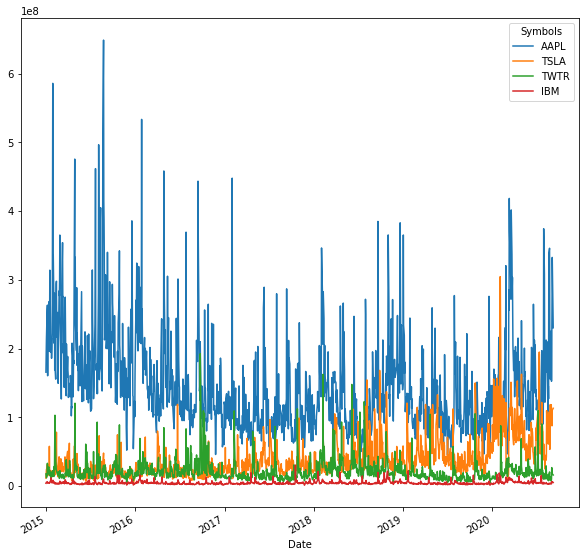

In [106]:
plt.figure()
vol.plot(figsize=(10,10))